### Imports

In [1]:
import pandas as pd

import warnings
warnings.filterwarnings(action="ignore")

### Connect to drive and load data

In [2]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
dir_path = "drive/MyDrive/data_ids_challenge"

df_data = pd.read_csv(f"{dir_path}/ML-EdgeIIoT-dataset-processed.csv", index_col=0)
df_label = pd.read_csv(f"{dir_path}/ML-EdgeIIoT-dataset-labels.csv", index_col=0)

## Split the data to train and test

In [4]:
for col in ['Attack_type']:
    df_label[col], _ = pd.factorize(df_label[col])

#### Binary classification

In [12]:
from sklearn.cluster import KMeans

In [12]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(df_data)

KMeans(n_clusters=2)

In [22]:
def get_success_rate_for_unsupervised(labels):
  counter_correctly_classified_b = 0

  for index in range(len(kmeans.labels_)):
      if kmeans.labels_[index] == df_label['Attack_label'].iloc[index]:
          counter_correctly_classified_b += 1
  return counter_correctly_classified_b

In [23]:
counter_correctly_classified_b = get_success_rate_for_unsupervised(df_label['Attack_label'])
print(f"Number of correctly classified rows: {counter_correctly_classified_b}")
print(f"Success percentage: {counter_correctly_classified_b/len(kmeans.labels_)*100}%")

Number of correctly classified rows: 81893
Success percentage: 51.89670468948036%


KMeans didn't work properly with 51% success rate (which is almost guessing)

### Multilabel classification

In [10]:
import numpy as np

In [13]:
kmeans = KMeans(n_clusters=15)
kmeans.fit(df_data)

KMeans(n_clusters=15)

Let's plot both labels to see if there is a certain match between the quantities

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

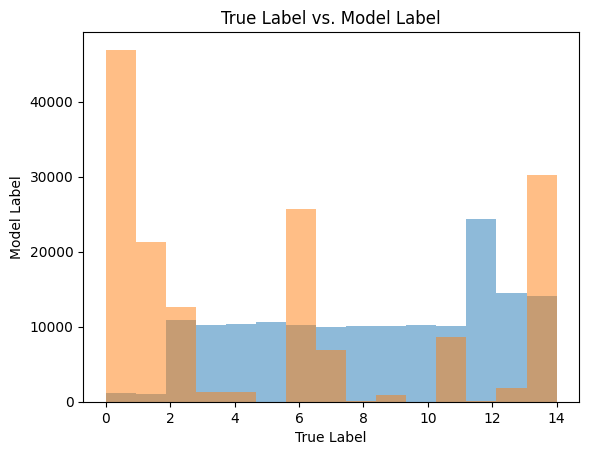

In [22]:
plt.hist(df_label['Attack_type'], bins=15, label='True Label', alpha=0.5)
plt.hist(kmeans.labels_, bins=15, label='Model Label', alpha=0.5)
plt.xlabel("True Label")
plt.ylabel("Model Label")
plt.title("True Label vs. Model Label")
plt.show()

<Axes: xlabel='Attack_type'>

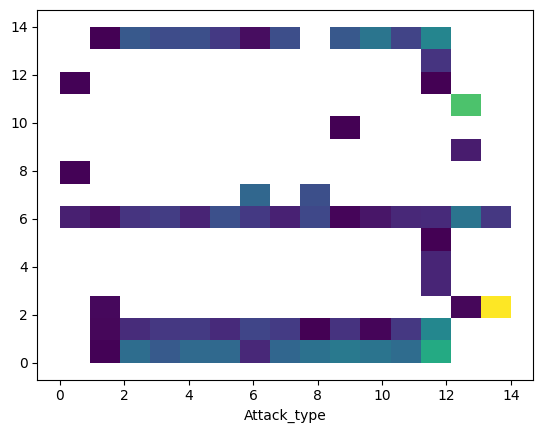

In [26]:
sns.histplot(x=df_label['Attack_type'], y=kmeans.labels_, cmap='viridis', stat='density', bins=15)

### DBSCAN

In [6]:
from sklearn.cluster import DBSCAN

In [7]:
eps = 0.7
dbscan = DBSCAN(eps=eps, min_samples=5)
labels = dbscan.fit_predict(df_data)

In [8]:
len(set(labels))

74

Clearly we can see that the number of labels here i way higher than what we look for.
Of course we can always tweak the parameters to get better results.